In [2]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas_datareader import data as pdr
from scipy.stats import norm

In [3]:
shares = pd.read_csv('Physical_shares.csv')

shares.set_index('Issuer', inplace = True)

In [4]:
shares

,Number of Shares,Bought/Sold
Issuer,,
BHP,5000,Bought
RIO,3000,Bought
CBA,4000,Bought
WESP,10000,Sold
WPL,5000,Bought
NAB,15000,Sold
TLS,30000,Sold


In [5]:
sharedata = pd.read_csv('RSKMShares.csv', index_col = 'Date', parse_dates = True)
sharedata.columns = ['ASX200', 'BHP', 'RIO', 'CBA', 'WESP', 'WPL', 'NAB', 'TLS']
sharedata.tail()

#sharedata = pd.read_csv('RSKMShares.csv')
#sharedata.columns = ['Date', 'ASX200', 'BHP', 'RIO', 'CBA', 'WESP', 'WPL', 'NAB', 'TLS']
#sharedata.head()

,ASX200,BHP,RIO,CBA,WESP,WPL,NAB,TLS
Date,,,,,,,,
2019-07-29,6825.8,40.60,98.78,83.25,40.05,34.58,28.58,3.90
2019-07-30,6845.1,40.83,99.00,83.40,39.84,34.67,28.65,3.95
2019-07-31,6812.6,40.76,98.90,82.30,39.19,34.70,28.51,3.97
2019-08-01,6788.9,40.26,97.81,81.92,39.63,34.60,28.64,3.95
2019-08-02,6768.6,38.78,94.77,81.88,38.86,33.81,28.51,3.98


c:\users\mat\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


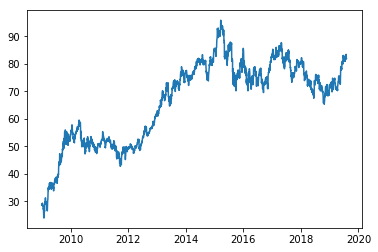

In [6]:
plt.plot(sharedata['CBA']);

In [7]:
share_log_returns = pd.DataFrame()
share_list = ['ASX200', 'BHP', 'RIO', 'CBA', 'WESP', 'WPL', 'NAB', 'TLS']
for x in share_list:
    #percentage returns commented below 
    #spot_returns[x + '_pct_return'] = spot_rates[x].pct_change()
    share_log_returns[x] = np.log(sharedata[x]).diff()

In [8]:
share_log_returns.tail()

,ASX200,BHP,RIO,CBA,WESP,WPL,NAB,TLS
Date,,,,,,,,
2019-07-29,0.004758,-0.006139,0.005278,0.007960,0.007770,0.006965,0.003154,0.015504
2019-07-30,0.002824,0.005649,0.002225,0.001800,-0.005257,0.002599,0.002446,0.012739
2019-07-31,-0.004759,-0.001716,-0.001011,-0.013277,-0.016450,0.000865,-0.004899,0.005051
2019-08-01,-0.003485,-0.012343,-0.011082,-0.004628,0.011165,-0.002886,0.004549,-0.005051
2019-08-02,-0.002995,-0.037454,-0.031574,-0.000488,-0.019621,-0.023097,-0.004549,0.007566


c:\users\mat\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\mat\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


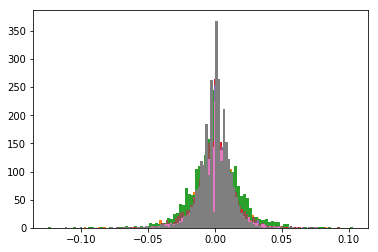

In [9]:
for x in share_list:
    plt.hist(share_log_returns[x], bins = 100);

In [10]:
cov_matrix = share_log_returns.cov()
cov_matrix

,ASX200,BHP,RIO,CBA,WESP,WPL,NAB,TLS
ASX200,0.000082,0.000110,0.000115,0.000086,0.000067,0.000088,0.000095,0.000042
BHP,0.000110,0.000280,0.000254,0.000088,0.000078,0.000147,0.000101,0.000035
RIO,0.000115,0.000254,0.000351,0.000092,0.000083,0.000143,0.000109,0.000035
CBA,0.000086,0.000088,0.000092,0.000149,0.000066,0.000077,0.000119,0.000040
WESP,0.000067,0.000078,0.000083,0.000066,0.000157,0.000067,0.000071,0.000037
WPL,0.000088,0.000147,0.000143,0.000077,0.000067,0.000231,0.000089,0.000036
NAB,0.000095,0.000101,0.000109,0.000119,0.000071,0.000089,0.000183,0.000042
TLS,0.000042,0.000035,0.000035,0.000040,0.000037,0.000036,0.000042,0.000150


In [11]:
share_list2 = ['BHP', 'RIO', 'CBA', 'WESP', 'WPL', 'NAB', 'TLS']
port_cov_matrix = share_log_returns[share_list2].cov()
port_cov_matrix

,BHP,RIO,CBA,WESP,WPL,NAB,TLS
BHP,0.000280,0.000254,0.000088,0.000078,0.000147,0.000101,0.000035
RIO,0.000254,0.000351,0.000092,0.000083,0.000143,0.000109,0.000035
CBA,0.000088,0.000092,0.000149,0.000066,0.000077,0.000119,0.000040
WESP,0.000078,0.000083,0.000066,0.000157,0.000067,0.000071,0.000037
WPL,0.000147,0.000143,0.000077,0.000067,0.000231,0.000089,0.000036
NAB,0.000101,0.000109,0.000119,0.000071,0.000089,0.000183,0.000042
TLS,0.000035,0.000035,0.000040,0.000037,0.000036,0.000042,0.000150


In [12]:
avg_returns = {}

for x in share_list:
    
    avg_returns[x] = share_log_returns[x].mean()

#share_log_returns.mean()
#avg_returns*100
avg_returns

{'ASX200': 0.00021657099386378497,
 'BHP': 0.00011226126228626703,
 'RIO': 0.00041694891847048347,
 'CBA': 0.00037914478559660967,
 'WESP': 0.0004225979897661213,
 'WPL': -2.1906819989952014e-05,
 'NAB': 0.0001317439424964622,
 'TLS': 1.3914167368269306e-05}

In [13]:
avg_returns['BHP']

0.00011226126228626703

In [14]:

shares.at['BHP', 'Number of Shares']
sharedata.loc['2009-01-02', 'BHP']


28.5752

In [15]:
#mark-to-market on 02/02/19
mtm_shares = {}
for s in share_list2:
    mtm_shares[s] = shares.at[s, 'Number of Shares'] * sharedata.loc['2019-08-02', s]

In [16]:
mtm_shares

{'BHP': 193900.0,
 'RIO': 284310.0,
 'CBA': 327520.0,
 'WESP': 388600.0,
 'WPL': 169050.0,
 'NAB': 427650.0,
 'TLS': 119400.0}

In [17]:
matrix_7x1 = (193900.0, 284310.0, 327520.0, -388600.0, -169050.0, 427650.0, -119400.0)
matrix_7x7 = port_cov_matrix

result = matrix_7x7.dot(matrix_7x1)
result
varience = result.dot(matrix_7x1)

STD = np.sqrt(varience)
STD

11856.124680388011